## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats 
import warnings
import sklearn.impute
warnings.filterwarnings("ignore")

## Read in data

In [3]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

## Data processing

In [4]:
obs.head(25)
species.head(25)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [17]:
# let's dig deeper into this column

species.conservation_status.value_counts()

# From this, it looks like we can assume the missing values are structurally missing data - any missing values likely
# indicate that the species is not endangered in any way

species.conservation_status.fillna('Not Endangered', inplace=True)
species.conservation_status.value_counts()
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered
1,Mammal,Bos bison,"American Bison, Bison",Not Endangered
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endangered
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Not Endangered
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Not Endangered
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Not Endangered
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Not Endangered


In [ ]:
# There are duplicates in the common names section which should be cleaned up

for row in df.common_names:
    [x for isinstance]

In [18]:
# First, we can merge into one dataset based on the scientific name

df = obs.merge(species, how='left', left_on='scientific_name', right_on='scientific_name')
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Endangered
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Endangered
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not Endangered
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not Endangered
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not Endangered
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Not Endangered
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Not Endangered
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Not Endangered
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Not Endangered


In [20]:
# Now I need the conservation status to be ordered from least to most endangered
df['conservation_status'] = pd.Categorical(df.conservation_status, ordered=True, categories=['Not Endangered', 'In Recovery', 'Species of Concern', 
                                                                'Threatened', 'Endangered'])

df['conservation_status']

0        Not Endangered
1        Not Endangered
2        Not Endangered
3        Not Endangered
4        Not Endangered
              ...      
25627    Not Endangered
25628    Not Endangered
25629    Not Endangered
25630    Not Endangered
25631    Not Endangered
Name: conservation_status, Length: 25632, dtype: category
Categories (5, object): [Not Endangered < In Recovery < Species of Concern < Threatened < Endangered]

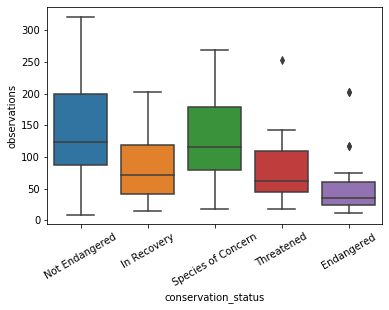

In [21]:
# Before we replace the values, I want to see if the observations of a species line up with the conservation status.
# There should be a linear relationship between conservation status and observations

sns.boxplot(data=df, x='conservation_status', y='observations')
plt.xticks(rotation=30)
plt.show()

# The box plot below looks like it largely makes senses - in recovery species are likely to have fewer observations due
# to more focused care. Other than this, the observations by endangerment levels make sense, barring a small number of
# threatened and endangered outliers

In [10]:
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Endangered
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Endangered
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not Endangered
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not Endangered
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not Endangered
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Not Endangered
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Not Endangered
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Not Endangered
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Not Endangered


In [22]:
species_conservation = species[species.conservation_status != "Not Endangered"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

species_conservation

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


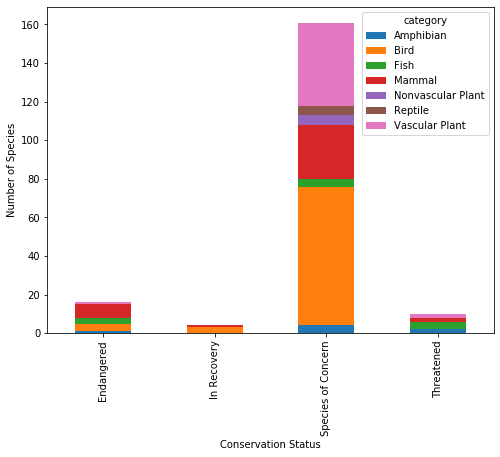

In [24]:
ax = species_conservation.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()

In [56]:
threatened = df[df.conservation_status != "Not Endangered"]

threatened = threatened.groupby(['park_name', 'conservation_status'])\
                ['observations'].sum().unstack()

threatened.drop(columns='Not Endangered', inplace=True)
threatened

conservation_status,In Recovery,Species of Concern,Threatened,Endangered
park_name,,,,
Bryce National Park,388.0,17011.0,591.0,619.0
Great Smoky Mountains National Park,248.0,11735.0,440.0,393.0
Yellowstone National Park,889.0,40677.0,1459.0,1558.0
Yosemite National Park,582.0,24539.0,849.0,943.0


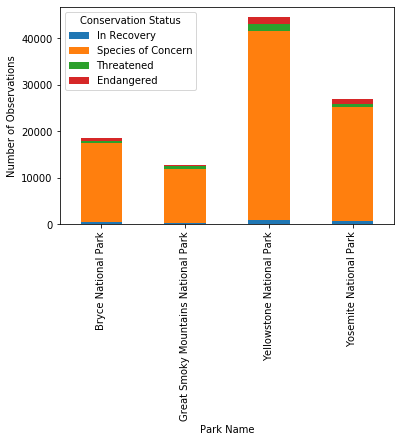

In [57]:
ax = threatened.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of Observations')
ax.set_xlabel('Park Name')
ax.legend(title='Conservation Status')

plt.show()

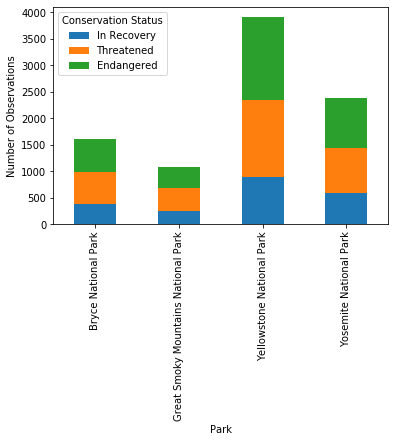

In [59]:
# This is difficult to visualize, so let's reproduce the chart without the species of concern.

endangered = threatened.drop('Species of Concern', axis=1)

ax = endangered.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of Observations')
ax.set_xlabel('Park')
ax.legend(title='Conservation Status')

plt.show()

# From here we can gauge an idea of the park home to the most endangered species and/or the size of each park
# Yellowstone Park has a significantly higher number of observations of species in recovery, 
# threatened and endangered, followed by Yosemite Park